In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, precision_score , recall_score, accuracy_score, f1_score
import pandas as pd
import seaborn as sns

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-15 12:57:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-15 12:57:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-15 12:57:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

In [3]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100 * 100)

In [4]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [5]:
print(pca.n_components_)

2


In [6]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [9]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

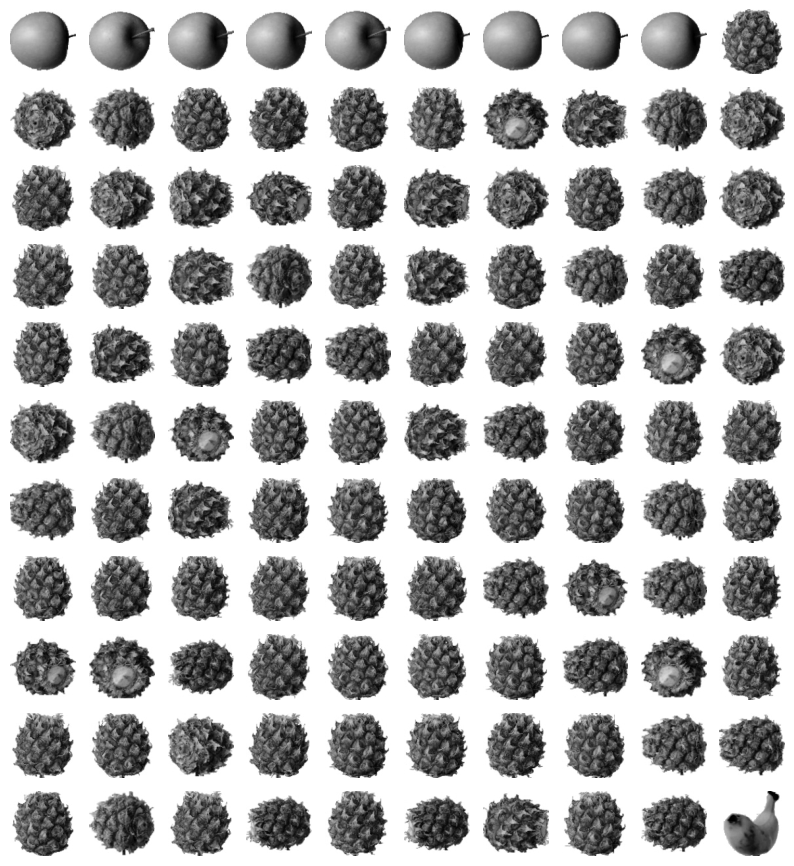



0


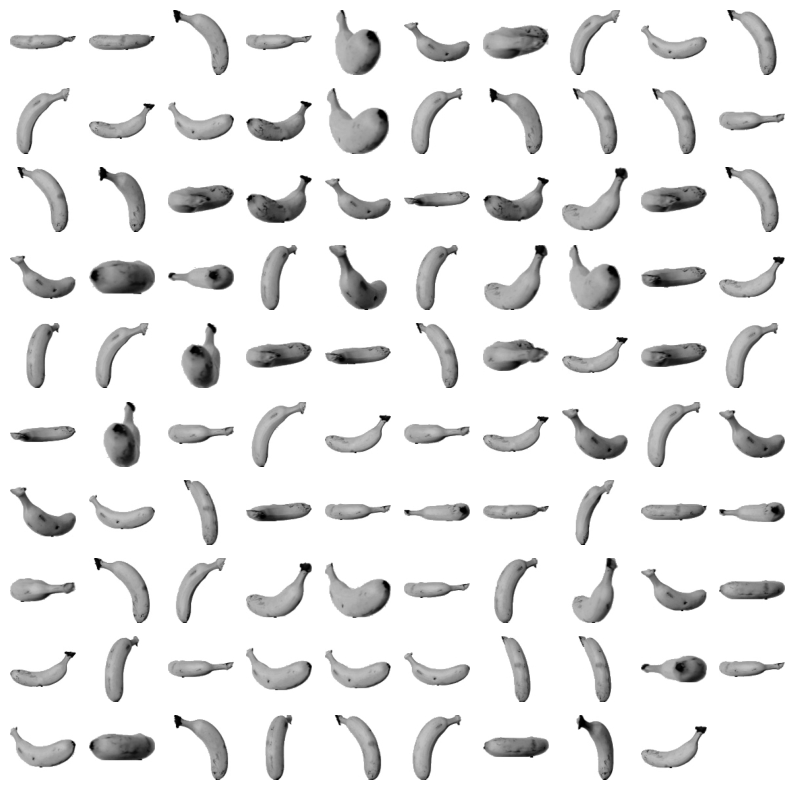



1


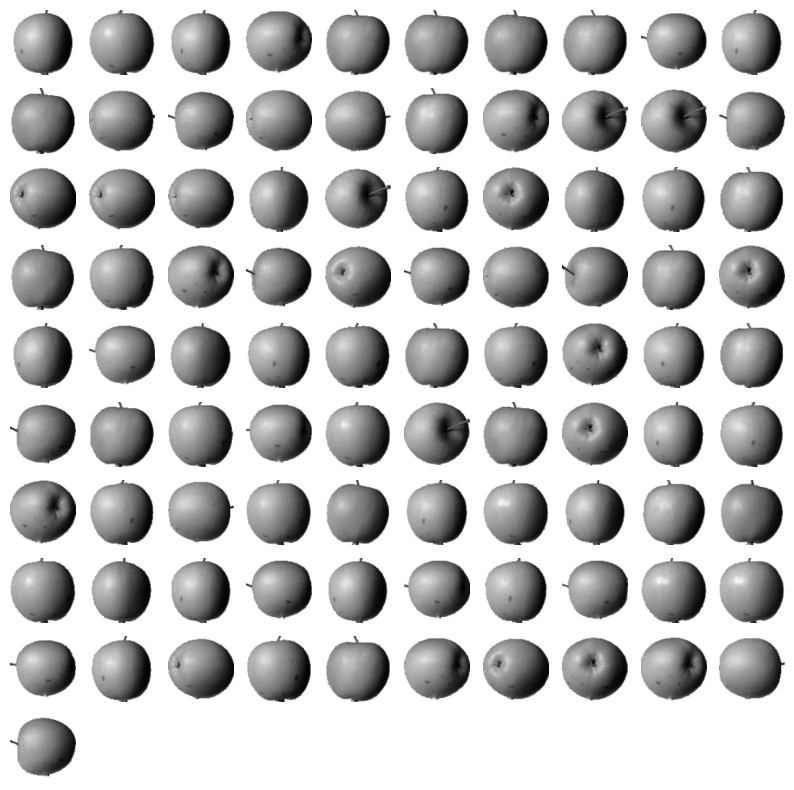



2


In [11]:
for label in range(3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')
  print(label)

## 평가지표

In [15]:
ytest = [2] * 100 + [0]*100 + [1]*100
pred = km.labels_

In [16]:
print('혼동행렬')
print(confusion_matrix(ytest, pred))

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred, average = 'macro')
recall = recall_score(ytest, pred, average = 'macro')
f1 = f1_score(ytest, pred, average = 'macro')

print('')
print('정확도 : ', accuracy)
print('정밀도 : ', precision)
print('재현율 : ', recall)
print('F1-score : ', f1)

혼동행렬
[[100   0   0]
 [  1  99   0]
 [  9   0  91]]

정확도 :  0.9666666666666667
정밀도 :  0.9696969696969697
재현율 :  0.9666666666666667
F1-score :  0.9667451359682145


### Confusion Matrix without Normalization

<Axes: >

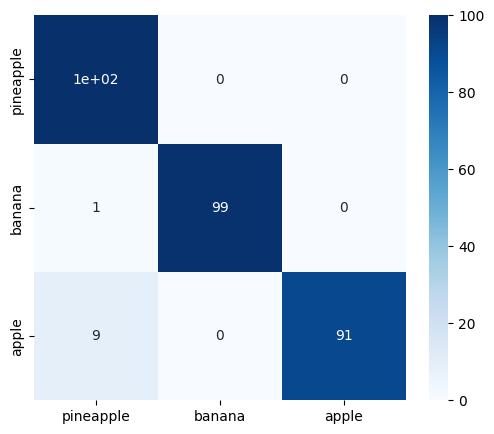

In [21]:
confusion = confusion_matrix(ytest, pred)
confusion_map = pd.DataFrame(confusion, index = ['pineapple','banana','apple'], columns = ['pineapple','banana','apple'])

plt.figure(figsize = (6,5))
sns.heatmap(confusion_map, annot = True, cmap='Blues')

### Confusion Matrix with Normalization

In [22]:
total = np.sum(confusion, axis=1)
confusion = confusion / total[:, None]
confusion

array([[1.  , 0.  , 0.  ],
       [0.01, 0.99, 0.  ],
       [0.09, 0.  , 0.91]])

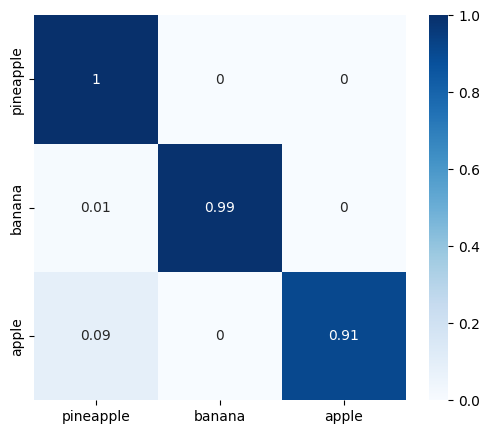

In [23]:
confusion_map_n = pd.DataFrame(confusion, index = ['pineapple','banana','apple'],
                               columns = ['pineapple','banana','apple'])
plt.figure(figsize = (6, 5))
sns.heatmap(confusion_map_n, cmap='Blues', annot = True)
plt.show()